<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter13/Image_super_resolution_using_SRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
if not os.path.exists('srgan.pth.tar'):
    %pip install -q torch_snippets
    !wget -q https://raw.githubusercontent.com/sizhky/a-PyTorch-Tutorial-to-Super-Resolution/master/models.py -O models.py
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    downloaded = drive.CreateFile({'id': '1_PJ1Uimbr0xrPjE8U3Q_bG7XycGgsbVo'})
    downloaded.GetContentFile('srgan.pth.tar')
    from torch_snippets import *
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
model = torch.load('srgan.pth.tar', map_location='cpu')['generator'].to(device)
model.eval()

/content/models.py:255: SyntaxWarning: "is" with a literal. Did you mean "=="?
  out_channels = (n_channels if i is 0 else in_channels * 2) if i % 2 is 0 else in_channels
/content/models.py:255: SyntaxWarning: "is" with a literal. Did you mean "=="?
  out_channels = (n_channels if i is 0 else in_channels * 2) if i % 2 is 0 else in_channels
/content/models.py:258: SyntaxWarning: "is" with a literal. Did you mean "=="?
  stride=1 if i % 2 is 0 else 2, batch_norm=i is not 0, activation='LeakyReLu'))
/content/models.py:258: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  stride=1 if i % 2 is 0 else 2, batch_norm=i is not 0, activation='LeakyReLu'))
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the cha

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (residual_blocks): Sequential(
      (0): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
          )
        )
        (conv_block2): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (1): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Seque

In [4]:
!wget -q https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG -O MyImage.jpg

In [5]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225]),
    T.Lambda(lambda x: x.to(device))
])

postprocess = T.Compose([
    T.Lambda(lambda x: (x.cpu().detach()+1)/2),
    T.ToPILImage()
])

In [18]:
image = readPIL('MyImage.jpg')
w, h = image.size
reduction_factor = 4
image = image.resize((w//reduction_factor,h//reduction_factor))
im = preprocess(image)

In [19]:
sr = model(im[None])[0]
sr = postprocess(sr)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


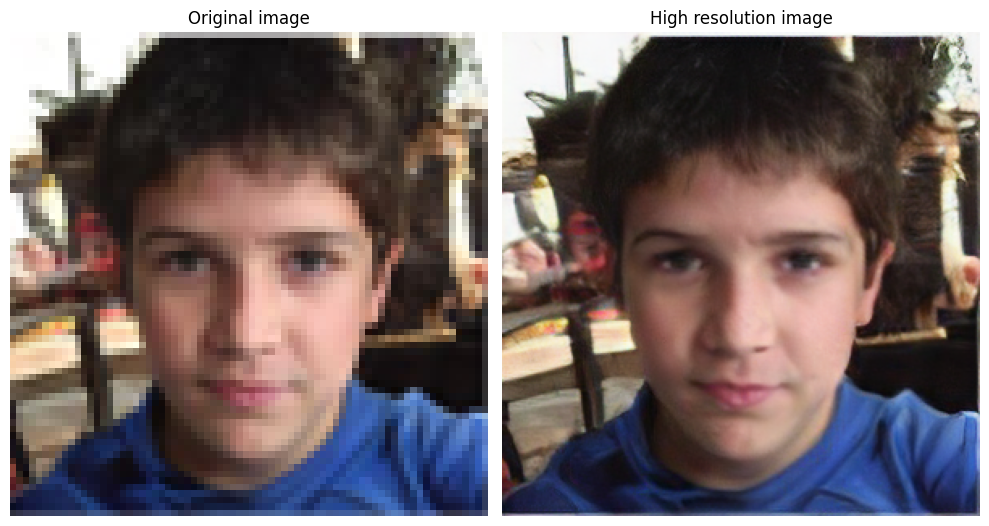

In [20]:
subplots([image, sr], nc=2, figsize=(10,10), titles=['Original image','High resolution image'])